In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import math

In [5]:
df=pd.read_csv('/content/drive/MyDrive/dataset_A_P.csv')
df.head()

,Unnamed: 0,SEAL,DE_DATE,ds_date,start_lat,start_lon,LAT,LON,activities,SWIM_EFF_BTM,PCA_BTM,MAX_DEP,TAD_S1_8,start_zone,end_zones
0,0,V13,13/10/2020 16:24,13/10/2020 16:24,49.377463,-1.156893,49.37741,-1.15692,OR,0.009,0,1.5,0.000,Z74,Z74
1,1,V13,13/10/2020 16:25,13/10/2020 16:25,49.377409,-1.156925,49.37740,-1.15693,OR,0.007,0,1.6,0.327,Z74,Z74
2,2,V13,13/10/2020 16:26,13/10/2020 16:25,49.377366,-1.156952,49.37733,-1.15698,OR,0.006,0,1.6,0.450,Z74,Z74
3,3,V13,13/10/2020 16:28,13/10/2020 16:27,49.377251,-1.157022,49.37724,-1.15703,OR,0.007,0,1.5,0.000,Z74,Z74
4,4,V13,13/10/2020 16:28,13/10/2020 16:28,49.377229,-1.157035,49.37722,-1.15704,OR,0.011,0,1.5,0.000,Z74,Z74


In [6]:
df["DE_DATE"]=pd.to_datetime(df["DE_DATE"])
df["ds_date"]=pd.to_datetime(df["ds_date"])
df["start_hour"]=df["ds_date"].dt.hour+df["ds_date"].dt.minute/60
df["end_hour"]=df["DE_DATE"].dt.hour+df["DE_DATE"].dt.minute/60
df.head()

<ipython-input-6-af29b935cc8a>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["DE_DATE"]=pd.to_datetime(df["DE_DATE"])
<ipython-input-6-af29b935cc8a>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["ds_date"]=pd.to_datetime(df["ds_date"])


,Unnamed: 0,SEAL,DE_DATE,ds_date,start_lat,start_lon,LAT,LON,activities,SWIM_EFF_BTM,PCA_BTM,MAX_DEP,TAD_S1_8,start_zone,end_zones,start_hour,end_hour
0,0,V13,2020-10-13 16:24:00,2020-10-13 16:24:00,49.377463,-1.156893,49.37741,-1.15692,OR,0.009,0,1.5,0.000,Z74,Z74,16.400000,16.400000
1,1,V13,2020-10-13 16:25:00,2020-10-13 16:25:00,49.377409,-1.156925,49.37740,-1.15693,OR,0.007,0,1.6,0.327,Z74,Z74,16.416667,16.416667
2,2,V13,2020-10-13 16:26:00,2020-10-13 16:25:00,49.377366,-1.156952,49.37733,-1.15698,OR,0.006,0,1.6,0.450,Z74,Z74,16.416667,16.433333
3,3,V13,2020-10-13 16:28:00,2020-10-13 16:27:00,49.377251,-1.157022,49.37724,-1.15703,OR,0.007,0,1.5,0.000,Z74,Z74,16.450000,16.466667
4,4,V13,2020-10-13 16:28:00,2020-10-13 16:28:00,49.377229,-1.157035,49.37722,-1.15704,OR,0.011,0,1.5,0.000,Z74,Z74,16.466667,16.466667


In [7]:
df.sort_values(by=["SEAL","ds_date","DE_DATE"],inplace=True)

In [8]:
dfo=df[["SEAL","start_lat","LAT","start_lon","LON","ds_date","DE_DATE"]]
dfo.head()

,SEAL,start_lat,LAT,start_lon,LON,ds_date,DE_DATE
0,V13,49.377463,49.37741,-1.156893,-1.15692,2020-10-13 16:24:00,2020-10-13 16:24:00
1,V13,49.377409,49.37740,-1.156925,-1.15693,2020-10-13 16:25:00,2020-10-13 16:25:00
2,V13,49.377366,49.37733,-1.156952,-1.15698,2020-10-13 16:25:00,2020-10-13 16:26:00
3,V13,49.377251,49.37724,-1.157022,-1.15703,2020-10-13 16:27:00,2020-10-13 16:28:00
4,V13,49.377229,49.37722,-1.157035,-1.15704,2020-10-13 16:28:00,2020-10-13 16:28:00


In [ ]:
# df = dfo.resample('120T', on='ds_date').first()
# df.head()

In [ ]:
# df.isna().sum()
# df.dropna(inplace=True)

In [9]:
def convertDateToSeconds(date):
#     date_heure = datetime.strptime(date, "%d/%m/%Y %H:%M")
    timestamp_en_secondes = date.timestamp()

    return timestamp_en_secondes
df["DE_DATE"]=df["DE_DATE"].apply(convertDateToSeconds)
df["ds_date"]=df["ds_date"].apply(convertDateToSeconds)

In [10]:
V14_df=df[df['SEAL']=="V14"]
V13_df=df[df['SEAL']=="V13"]
V15_df=df[df['SEAL']=="V15"]
V16_df=df[df['SEAL']=="V16"]

In [11]:
V14_df.head()

,Unnamed: 0,SEAL,DE_DATE,ds_date,start_lat,start_lon,LAT,LON,activities,SWIM_EFF_BTM,PCA_BTM,MAX_DEP,TAD_S1_8,start_zone,end_zones,start_hour,end_hour
123049,123049,V14,1.602690e+09,1.602689e+09,49.392099,-1.137004,49.39160,-1.13711,OR,0.0180,0,1.8,0.521,Z74,Z74,15.500000,15.533333
123050,123050,V14,1.602690e+09,1.602690e+09,49.391388,-1.137156,49.39083,-1.13728,OR,0.0325,0,2.7,0.735,Z74,Z74,15.550000,15.600000
123051,123051,V14,1.602690e+09,1.602690e+09,49.390663,-1.137311,49.39057,-1.13733,OR,0.0365,0,2.6,0.559,Z74,Z74,15.616667,15.616667
123052,123052,V14,1.602690e+09,1.602690e+09,49.389861,-1.137482,49.38942,-1.13758,OR,0.0170,0,2.0,0.777,Z74,Z74,15.666667,15.700000
123053,123053,V14,1.602690e+09,1.602690e+09,49.389135,-1.137638,49.38867,-1.13774,OR,0.0300,0,2.2,0.462,Z74,Z74,15.716667,15.750000


In [12]:
#Train data
start=np.array(V14_df[["start_lat","start_lon"]])
end  =np.array(V14_df[["LAT","LON"]])
data=[]

for i in range(len(start)):
  data.append(start[i])
  # data.append(end[i])
data=np.array(data)

#Test data
start_test = np.array(V13_df[["start_lat","start_lon"]])
end_test = np.array(V13_df[["LAT","LON"]])
data_test = []
for i in range(len(start_test)):
  data_test.append(start_test[i])
  # data_test.append(end_test[i])
data_test=np.array(data_test)

#Train data v1
start1=np.array(V15_df[["start_lat","start_lon"]])
end1  =np.array(V15_df[["LAT","LON"]])
data1=[]
for i in range(len(start1)):
  data1.append(start1[i])
  # data1.append(end1[i])
data1=np.array(data1)

#Test data v1
start_test1=np.array(V16_df[["start_lat","start_lon"]])
end_test1 =np.array(V16_df[["LAT","LON"]])
data_test1=[]
for i in range(len(start_test1)):
  data_test1.append(start_test1[i])
  # data_test1.append(end_test1[i])
data_test1=np.array(data_test1)

data_test.shape,data.shape,data_test1.shape,data1.shape

((42064, 2), (49404, 2), (20876, 2), (18846, 2))

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


import random
from math import sin,cos,pi
import matplotlib.pyplot as plt

import h5py, json
import os,time,sys

In [14]:
# max_t = 1000
# delta_t= 0.02
features_len = 2

sequence_len = 8
predict_len = 5

#__about training

# scale     =1
# train_prop=.8
batch_size=16
epochs    =5

In [15]:
x_train= data
x_test = data_test
x_test1 = data_test1
x_test2 = data1


x_train[:5]

array([[49.392099, -1.137004],
       [49.391388, -1.137156],
       [49.390663, -1.137311],
       [49.389861, -1.137482],
       [49.389135, -1.137638]])

In [16]:
#standardisation
mean = x_train.mean()
std = x_train.std()
x_train = (x_train - mean)/std
x_test  = (x_test - mean)/std
x_test1  = (x_test1 - mean)/std
x_test2  = (x_test2 - mean)/std
print("Dataset generated :")
print("Train shape is :",x_train.shape)
print("Test shape is :",x_test.shape)

Dataset generated :
Train shape is : (49404, 2)
Test shape is : (42064, 2)


In [ ]:
#normalisation


min_val = x_train.min()
max_val = x_train.max()


x_train = (x_train - min_val) / (max_val - min_val)
x_test = (x_test - min_val) / (max_val - min_val)
x_test1 = (x_test1 - min_val) / (max_val - min_val)
x_test2 = (x_test2 - min_val) / (max_val - min_val)


In [17]:
train_generator = TimeseriesGenerator(x_train,x_train, length=sequence_len,batch_size=batch_size)
test_generator  = TimeseriesGenerator(x_test,x_test, length=sequence_len,batch_size=batch_size)
test_generator1  = TimeseriesGenerator(x_test1,x_test1, length=sequence_len,batch_size=batch_size)
test_generator2  = TimeseriesGenerator(x_test2,x_test2, length=sequence_len,batch_size=batch_size)

x,y=train_generator[0]
print('Number of batch trains available : ', len(train_generator))
print('batch x shape :',x.shape)
print('batch y shape :',y.shape)
# print('batch z shape :',z.shape)

print('what a batch looks like (x)')
print(x[0])
print('what a batch looks like (y)')
print(y[0])
# print('what a batch looks like (z)')
# print(z[0])
# batch x shape : (32, 20, 2) : 32 sequence, each sequence is a vector of 20 composant and each compostant has 2 dim
# batch y shape : (32, 2) <=> (32, 1, 2) y est le 21 vecteur de x

Number of batch trains available :  3088
batch x shape : (16, 8, 2)
batch y shape : (16, 2)
what a batch looks like (x)
[[ 0.99492902 -0.99649629]
 [ 0.994901   -0.99650228]
 [ 0.99487243 -0.99650839]
 [ 0.99484082 -0.99651513]
 [ 0.99481221 -0.99652128]
 [ 0.99477764 -0.99652865]
 [ 0.99472818 -0.99653925]
 [ 0.99472341 -0.99654024]]
what a batch looks like (y)
[ 0.99455174 -0.99657697]


In [24]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import LearningRateScheduler

# Modèle séquentiel
model = models.Sequential()

# Couche d'entrée
model.add(layers.InputLayer(shape=(sequence_len, features_len)))

# Couche LSTM bidirectionnelle pour capturer les relations temporelles dans les deux sens
model.add(layers.Bidirectional(layers.LSTM(100, return_sequences=True, activation='relu')))
model.add(layers.Dropout(0.2))

# # Couche LSTM supplémentaire
model.add(layers.LSTM(50, return_sequences=False, activation='relu'))
model.add(layers.Dropout(0.2))

# Couche Dense pour la sortie
model.add(layers.Dense(features_len))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional)      │ (None, 8, 200)              │          82,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          50,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,702 (518.37 KB)

 Trainable params: 132,702 (518.37 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
save_dir = './best_model.keras'
best_model_callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath=save_dir,
    verbose=0,
    save_best_only=True,
    # save_format='keras'
)
def scheduler(epoch, lr):
    if epoch == 5:
        lr=0.000001 # Réduction du learning rate par 10 toutes les 5 époques
    elif epoch == 10:
        lr=0.00001
    elif epoch == 15:
        lr=0.0001
    elif epoch == 19:
        lr=0.000001
    return lr
lr_scheduler = LearningRateScheduler(scheduler)

In [26]:
from keras.losses import Huber
from tensorflow.keras.optimizers import Adam


optimizer = Adam(learning_rate=0.0000001)

model.compile(optimizer=optimizer, loss=Huber(), metrics=['mae'])

In [27]:
history=model.fit(train_generator,
                 epochs=20,
                 verbose=1,
                 validation_data=test_generator,
                 callbacks=[best_model_callbacks,lr_scheduler])

Epoch 1/20
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 74s 23ms/step - loss: 0.4657 - mae: 0.9647 - val_loss: 0.4533 - val_mae: 0.9521 - learning_rate: 1.0000e-07
Epoch 2/20
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 65s 21ms/step - loss: 0.4543 - mae: 0.9528 - val_loss: 0.4421 - val_mae: 0.9403 - learning_rate: 1.0000e-07
Epoch 3/20
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 68s 22ms/step - loss: 0.4427 - mae: 0.9405 - val_loss: 0.4308 - val_mae: 0.9282 - learning_rate: 1.0000e-07
Epoch 4/20
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 83s 22ms/step - loss: 0.4309 - mae: 0.9279 - val_loss: 0.4194 - val_mae: 0.9158 - learning_rate: 1.0000e-07
Epoch 5/20
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - loss: 0.4197 - mae: 0.9157 - val_loss: 0.4080 - val_mae: 0.9033 - learning_rate: 1.0000e-07
Epoch 6/20
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - loss: 0.3805 - mae: 0.8709 - val_loss: 0.2735 - val_mae: 0.7392 - learning_rate: 1.0000e-06
Epoch 7/20
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - loss: 0.2372 - mae: 0.6831 - val_loss: 0.1

Fintuning same model [this part is optional]

In [ ]:
# loaded_model_for_fintune = tf.keras.models.load_model('./best_model.keras')


# # loaded_model_for_fintune.compile(optimizer='adam', loss=Huber(), metrics=['mae'])
# optimizer = Adam(learning_rate=0.01)

# loaded_model_for_fintune.compile(optimizer=optimizer, loss=Huber(), metrics=['mae'])

# history=loaded_model_for_fintune.fit(test_generator,
#                  epochs=20,
#                  verbose=1,
#                  validation_data = test_generator2,
#                  callbacks=[best_model_callbacks])

Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.0087 - mae: 0.0909

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - loss: 0.0087 - mae: 0.0907 - val_loss: 1.6746e-05 - val_mae: 0.0057
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 39s 192ms/step - loss: 0.0013 - mae: 0.0403 - val_loss: 2.3113e-05 - val_mae: 0.0066
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 34s 204ms/step - loss: 7.2657e-04 - mae: 0.0302 - val_loss: 1.1751e-05 - val_mae: 0.0047
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 33s 198ms/step - loss: 3.7350e-04 - mae: 0.0217 - val_loss: 1.0141e-05 - val_mae: 0.0044
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 47s 234ms/step - loss: 1.7580e-04 - mae: 0.0149 - val_loss: 8.7308e-07 - val_mae: 0.0010
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - loss: 7.6910e-05 - mae: 0.0098 - val_loss: 1.7903e-06 - val_mae: 0.0017
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 41s 193ms/step - loss: 3.3023e-05 - mae: 0.0065 - val_loss: 3.8310e-06 - val_mae: 0.0026
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 41s 194ms/step - loss: 1.4644e-05 - mae: 0.0043 - val_loss: 1.2040e-06 - val

End fintuning

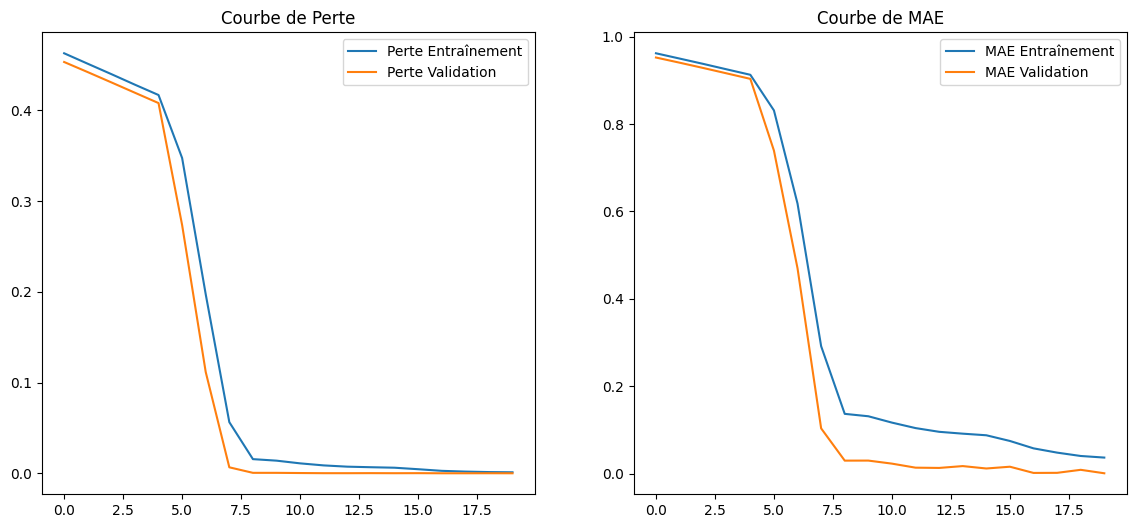

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs_range = range(len(loss))

# loss curve
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Perte Entraînement')
plt.plot(epochs_range, val_loss, label='Perte Validation')
plt.legend(loc='upper right')
plt.title('Courbe de Perte')

# MAE curve
plt.subplot(1, 2, 2)
plt.plot(epochs_range, mae, label='MAE Entraînement')
plt.plot(epochs_range, val_mae, label='MAE Validation')
plt.legend(loc='upper right')
plt.title('Courbe de MAE')

plt.show()


In [29]:
loaded_model = tf.keras.models.load_model('./best_model.keras')

## Test section

In [31]:
loaded_model = tf.keras.models.load_model('./best_model.keras')

val_loss, val_mae = loaded_model.evaluate(test_generator2)

print(f'Validation Loss: {val_loss}')
print(f'Validation MAE: {val_mae}')

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7.6187e-07 - mae: 9.6488e-04
Validation Loss: 5.03908779592166e-07
Validation MAE: 0.0007867753738537431


In [32]:
s=random.randint(0,len(x_test)-sequence_len)

sequence  = x_test[s:s+sequence_len]
sequence_true = x_test[s:s+sequence_len+1]

#predict next position
step_predicted = loaded_model.predict(np.array([sequence]))
step_predicted = step_predicted
# print(step_predicted)
print("True values ----- Predict values")
for nbr in range(len(sequence_true[-1])):
  print(f"{sequence_true[-1][nbr]*std+mean:.4f} _-----_ {step_predicted[0][nbr]*std+mean:.4f}")
# sequence_predicted=np.vstack((sequence, step_predicted))

# map = create_map_with_routes(sequence_true, sequence_predicted)

# # Afficher la carte
# map

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
True values ----- Predict values
49.3770 _-----_ 49.3917
-1.1576 _-----_ -1.1107
